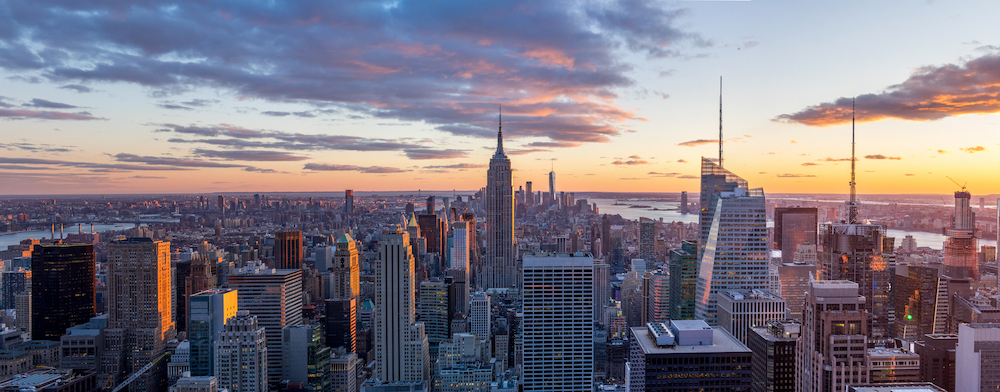

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

How to approach the project
1. Loading the data

2. Merging the three DataFrames

3. Determining the earliest and most recent review dates

4. Finding how many listings are private rooms

5. Finding the average price of listings

6. Creating a DataFrame with the four solution values

In [61]:
# Import libraries
import pandas as pd
import numpy as np

### 1. Loading the data

Use appropriate pandas methods to read the three different file types into three DataFrames. Take a look at the data in each.

In [62]:
price = pd.read_csv('data/airbnb_price.csv')
price.head()

listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown

In [63]:
room_type = pd.ExcelFile('data/airbnb_room_type.xlsx')
room_type.sheet_names

['airbnb_room_type']

In [65]:
df = room_type.parse(0)
df.head()

listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt

In [67]:
last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')
last_review.head()

listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019

In [68]:
def display_info_and_na(df_list):
    for dataset in df_list:
        print(f"DataFrame: {dataset['name']}")
        dataset['data'].info()
        print("\nMissing values:\n", dataset['data'].isna().sum())
        print("\n" + "="*50 + "\n")

# List of dataframes with their names
dataframes = [
    {'name': 'price', 'data': price},
    {'name': 'df', 'data': df},
    {'name': 'last_review', 'data': last_review}
]

# Call the function
display_info_and_na(dataframes)

DataFrame: price
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB

Missing values:
 listing_id     0
price          0
nbhood_full    0
dtype: int64


DataFrame: df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB

Missing values:
 listing_id      0
description    10
room_type       0
dtype: int64


DataFrame: last_review
<class 'pandas.core.frame.DataFrame'>
RangeIn

### 2. Merging the three DataFrames

You can answer the questions most efficiently by combining the three DataFrames into a single DataFrame after importing them.

In [69]:
# Join the three data frames together into one
merged_1 = pd.merge(price, df, on='listing_id')
merged_1.head()

listing_id  ...        room_type
0        2595  ...  Entire home/apt
1        3831  ...  Entire home/apt
2        5099  ...  Entire home/apt
3        5178  ...     private room
4        5238  ...  Entire home/apt

[5 rows x 5 columns]

In [70]:
merged_2 = pd.merge(merged_1, last_review, on='listing_id')
merged_2.head()

listing_id        price  ...    host_name   last_review
0        2595  225 dollars  ...     Jennifer   May 21 2019
1        3831   89 dollars  ...  LisaRoxanne  July 05 2019
2        5099  200 dollars  ...        Chris  June 22 2019
3        5178   79 dollars  ...     Shunichi  June 24 2019
4        5238  150 dollars  ...          Ben  June 09 2019

[5 rows x 7 columns]

In [72]:
merged_2['last_review_date'] = pd.to_datetime(merged_2['last_review'], format='%B %d %Y')
display(merged_2.info(), merged_2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   listing_id        25209 non-null  int64         
 1   price             25209 non-null  object        
 2   nbhood_full       25209 non-null  object        
 3   description       25199 non-null  object        
 4   room_type         25209 non-null  object        
 5   host_name         25201 non-null  object        
 6   last_review       25209 non-null  object        
 7   last_review_date  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.7+ MB


None

listing_id        price  ...   last_review last_review_date
0        2595  225 dollars  ...   May 21 2019       2019-05-21
1        3831   89 dollars  ...  July 05 2019       2019-07-05
2        5099  200 dollars  ...  June 22 2019       2019-06-22
3        5178   79 dollars  ...  June 24 2019       2019-06-24
4        5238  150 dollars  ...  June 09 2019       2019-06-09

[5 rows x 8 columns]

### 3. Determining the earliest and most recent review dates

To compare review dates, you'll need to convert the relevant reviews column to a date format.

In [73]:
earliest_review = merged_2['last_review_date'].min()
recent_review = merged_2['last_review_date'].max()
display(earliest_review, recent_review)

Timestamp('2019-01-01 00:00:00')

Timestamp('2019-07-09 00:00:00')

### 4. Finding how many listings are private rooms

You may have noticed that room_type has variations in capitalization. Use pandas to clean the data to get a reliable count of private rooms listings.

In [74]:
# before
merged_2['room_type'].unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [75]:
# How many of the listings are private rooms?
# Since there are differences in capitalization, make capitalization consistent
# after
merged_2['room_type'] = merged_2['room_type'].str.lower()
merged_2['room_type'].unique()

array(['entire home/apt', 'private room', 'shared room'], dtype=object)

In [76]:
private_room_count_all = merged_2['room_type'].value_counts()
private_room_count_all

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [78]:
private_room_count = merged_2[merged_2['room_type']=='private room'].shape[0]
private_room_count

11356

### 5. Finding how many listings are private rooms
You may have noticed that room_type has variations in capitalization. Use pandas to clean the data to get a reliable count of private rooms listings.

In [81]:
# What is the average listing price?
# To convert price to numeric, remove " dollars" from each value
merged_2['price_clean'] = merged_2['price'].str.replace(' dollars', '').astype(float)
display(merged_2.info(), merged_2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   listing_id        25209 non-null  int64         
 1   price             25209 non-null  object        
 2   nbhood_full       25209 non-null  object        
 3   description       25199 non-null  object        
 4   room_type         25209 non-null  object        
 5   host_name         25201 non-null  object        
 6   last_review       25209 non-null  object        
 7   last_review_date  25209 non-null  datetime64[ns]
 8   price_clean       25209 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.9+ MB


None

listing_id        price  ... last_review_date price_clean
0        2595  225 dollars  ...       2019-05-21       225.0
1        3831   89 dollars  ...       2019-07-05        89.0
2        5099  200 dollars  ...       2019-06-22       200.0
3        5178   79 dollars  ...       2019-06-24        79.0
4        5238  150 dollars  ...       2019-06-09       150.0

[5 rows x 9 columns]

In [82]:
avg_list_price = round(merged_2['price_clean'].mean(),2)
avg_list_price

141.78

### 6. Creating a DataFrame with the four solution values

Combine the insights gathered into one DataFrame called `review_dates` containing four columns and one row of data, and round the `avg_price` to two decimal places.

In [83]:
review_dates = pd.DataFrame({
    'first_reviewed': [earliest_review],
    'last_reviewed': [recent_review],
    'nb_private_rooms': [private_room_count],
    'avg_price': [avg_list_price]
})

print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78
